# QCTO - Workplace Module

### Project Title: Customer segmentation to predict profit scores
#### Done By: Vuyiswa Kubalasa

© ExploreAI 2024

---

## Table of Contents

<a id = "cont"></a>

[Background Context](#BC)

[1. Importing Packages](#one)

[2. Data Collection and Description](#two)

[3. Loading Data](#three)

[4.Data Cleaning and Filtering](#four)

[5. Exploratory Data Analysis (EDA)](#five)

[6. Modeling](#six)

[7. Evaluation and Validation](#seven)

[8. Final Model](#eight)

[9. Conclusion and Future Work](#nine)

[10. References](#ten)


---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

Banks have a large cutsomer base with varying behavioural characteristics in terms of spend behaviour, revolving behaviour, age, disposal income, etc. Most banks focus predominantly on booking clients with a low probability of defaulting, rightful so given the risk involved in borrowing money. 

However, the primary purpose of banks lending money is to make profit and there a few banks actively looking into whether the clients they are booking are likely to be profitable or not. This project aims to indicate to stakeholders that a good balance of expected risk and expected profitability should be considered when booking clients. Similar to risk with scorecards, we develop a profit scoring method to determine profit score and test models to predict these profit scores.

Profitability can be seen as the long-term value of a customer. Customer Lifetime Value (CLTV) is a metric that represents the total amount of money a customer is expected to spend in a business/ bank during the lifetime of the card. It's a crucial measure that helps businesses in strategizing their marketing efforts, resource allocation and product development.

At application we may not have enough historical information to determine the clients probability of being profitable. For now this project focuses on scoring existing clients profit in a given month, similar scorecard are not only used at application but client's probability of defaulting is continiously assessed once they are on book. 

The aim is to detailed segmentation of existing customers using their  historical behaviour we can identify customer segments likely to be highly profitable during the lifetime of having the credit card.

**Project objective**: The are two distinct objects of this project to predict customers profit score in order to identify high value clients (high profitability with low to medium risk of defaulting). Profit score is the probability of generating high profitability. The main questions we aim to answer is:
>  1) determine a standard way to score a customers relative profitability, to determine high profitable clients 
2) predict profit scores which will help us understand what customers segments result in high profitability 

**Data Source**: Fictitious data was used. Not exhasutive list of variables that could be used. Future include more fields like how many other creidt cards do they have, payment history 

**Importance of study**: Once we are able to reference high profitability to certain segments we will be able to predict highly profitable segments and can use this to suggest incentives to increase profit score as a clients continue to bank with us.

At the end of this project, the business will gain a comprehensive understanding of how certain customer behaviours or segments influence profitability, the project will help to effectively allocate resources. Instead of spreading resources over all customers, but identifying expected profitability at application banks can focus various efforts based on profit scoring. For identified high value (profitability) clients, the bank can focus on offering personalized rewards to retain these profitable segments. For idenified low value (profitable) clients banks can adjust pricing and product development strategies to that maximize profits without losing valuable customers. Furthermore, the project will help in in forecasting expected profitability likelihood and making informed decisions about potential investments in customer acquisition and retention.

**Methodology Overview**: Here is a brief overview of the methods and technique we plan to use in the analysis. We will:
> 1) determine a profit score from the profit value, we can convert the probabilities to binary categorization 0 for low profitable client and 1 for high profitable client based on a subjective profitability threshold 
2) use ML algorithms to predict profit scores 
3) determine unique segments that contribute to high profitability
4) use clustering to determine how a cluster algoritm would label higly profitable clients, and if this aligns with our profit scoring method 
.

Future, this is measure at one time point with consistency take the historical profitability in the last 6 months into account. In the future extending this to a series of cycles.

**Structure of the Notebook**

Include an info graph or something

---

---
<a id= "one" ></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>


In [1]:
import pandas as pd 
import numpy as np
import os  # get path of notebook 


#Plotting 
import matplotlib.pyplot as plt


#ML algorithm
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

---
<a id=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

The source the data data, we conducted some web scraping for credit card datasets and examined some dataset from github repositories, this data although it does not have all the fields we hoping for to conduct a comprehensive analysis, it contains the necessarily fields in comparison to the other credit card datasets. The data was source from [kaggle](https://www.kaggle.com/code/shawkyelgendy/credit-card-cs-eda-and-ml/notebook), it consists of aggregated credit card data including the customers total spend and balance throughout the lifetime of having the card. There are 10127 entries and 23 columns in total, an indepth data dictionary can be found [here](https://github.com/VuyiswaK/Workplace_project/blob/main/README.md).


---
<a id="three"></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>


In [2]:
path_all = os.getcwd()
df = pd.read_csv(path_all + '\data.csv')

In [3]:
df.head()

,Id,Account_status,Salary,Internal_PD,External_PD,Loan_amount,Profit,Banking_with_bank,Months_on_book,External_utilisation,Internal_utilisation,Spend_percentage,Probability,Profit_score
0,11,In_order,240000.0,0.051143,0.204545,16900.0,-5.89,1,67.0,0.241335,0.750759,0.016166,0.377578,4.0
1,19,In_order,360000.0,0.019587,0.539773,36000.0,547.10,1,20.0,0.370775,0.616521,0.009537,0.480096,5.0
2,22,In_order,893532.0,0.116431,0.357955,79900.0,384.87,1,122.0,0.866172,0.842748,0.006621,0.304842,4.0
3,24,In_order,254376.0,0.488575,0.323864,20000.0,-509.66,1,18.0,0.327666,0.511176,0.136263,0.244923,3.0
4,27,In_order,120000.0,0.008161,0.147727,23800.0,511.47,0,74.0,0.241431,0.287635,0.287312,0.564953,6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23455 entries, 0 to 23454
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    23455 non-null  int64  
 1   Account_status        23455 non-null  object 
 2   Salary                23455 non-null  float64
 3   Internal_PD           23455 non-null  float64
 4   External_PD           23455 non-null  float64
 5   Loan_amount           23455 non-null  float64
 6   Profit                23455 non-null  float64
 7   Banking_with_bank     23455 non-null  int64  
 8   Months_on_book        23455 non-null  float64
 9   External_utilisation  23455 non-null  float64
 10  Internal_utilisation  23455 non-null  float64
 11  Spend_percentage      23455 non-null  float64
 12  Probability           23455 non-null  float64
 13  Profit_score          23455 non-null  float64
dtypes: float64(11), int64(2), object(1)
memory usage: 2.5+ MB


---
<a id="four"></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

#### Check for duplicates 

In [5]:
df_copy = df.copy()  # copy dataframe
df_copy.duplicated().sum()


0


#### Handle missing values

In [6]:
for column in df_copy:
    if df_copy[column].isnull().any():
        print('{0} has {1} null values'.format(column, df_copy[column].isnull().sum()))
        
# No missing data 

#### Check for outliers

In [7]:
df_copy.describe()

,Id,Salary,Internal_PD,External_PD,Loan_amount,Profit,Banking_with_bank,Months_on_book,External_utilisation,Internal_utilisation,Spend_percentage,Probability,Profit_score
count,23455.000000,2.345500e+04,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000
mean,94699.160307,3.929405e+05,0.153750,0.376262,37833.522874,255.438034,0.637220,86.634151,0.517200,0.653003,0.185365,0.484279,5.340567
std,54723.266658,3.692259e+05,0.193380,0.196185,35787.475704,1162.875141,0.480812,83.350999,0.306794,0.261508,0.199841,0.163346,1.655057
min,11.000000,6.000000e+04,0.000000,0.000000,2000.000000,-9668.970000,0.000000,13.000000,0.000038,0.000287,0.000000,0.001498,1.000000
25%,47157.500000,1.800000e+05,0.031012,0.210227,13000.000000,-36.965000,0.000000,26.000000,0.265914,0.471907,0.059236,0.391234,4.000000
50%,94601.000000,2.903760e+05,0.072361,0.369318,25000.000000,159.910000,1.000000,56.000000,0.476296,0.725800,0.123445,0.468431,5.000000
75%,142492.000000,4.791420e+05,0.196409,0.528409,50000.000000,448.130000,1.000000,120.000000,0.745333,0.868665,0.233888,0.563012,6.000000
max,189370.000000,4.884000e+06,1.000000,1.000000,200000.000000,10152.470000,1.000000,528.000000,1.199987,1.073706,1.422559,0.999494,10.000000


**Remarks**
* The profit variable may have outliers, as the minimum and maximum profit are far from the first and third quantile.
* External PD and spend percentage too may have outlier on the upper end 
* The irregular shape for banking with bank is because it is a binary variable, similar with profit score it is a multi-class discrete variable.

The five number summary alone, is not enough to identify outliers. We plot violin plots to visually observe outliers from a different lense.

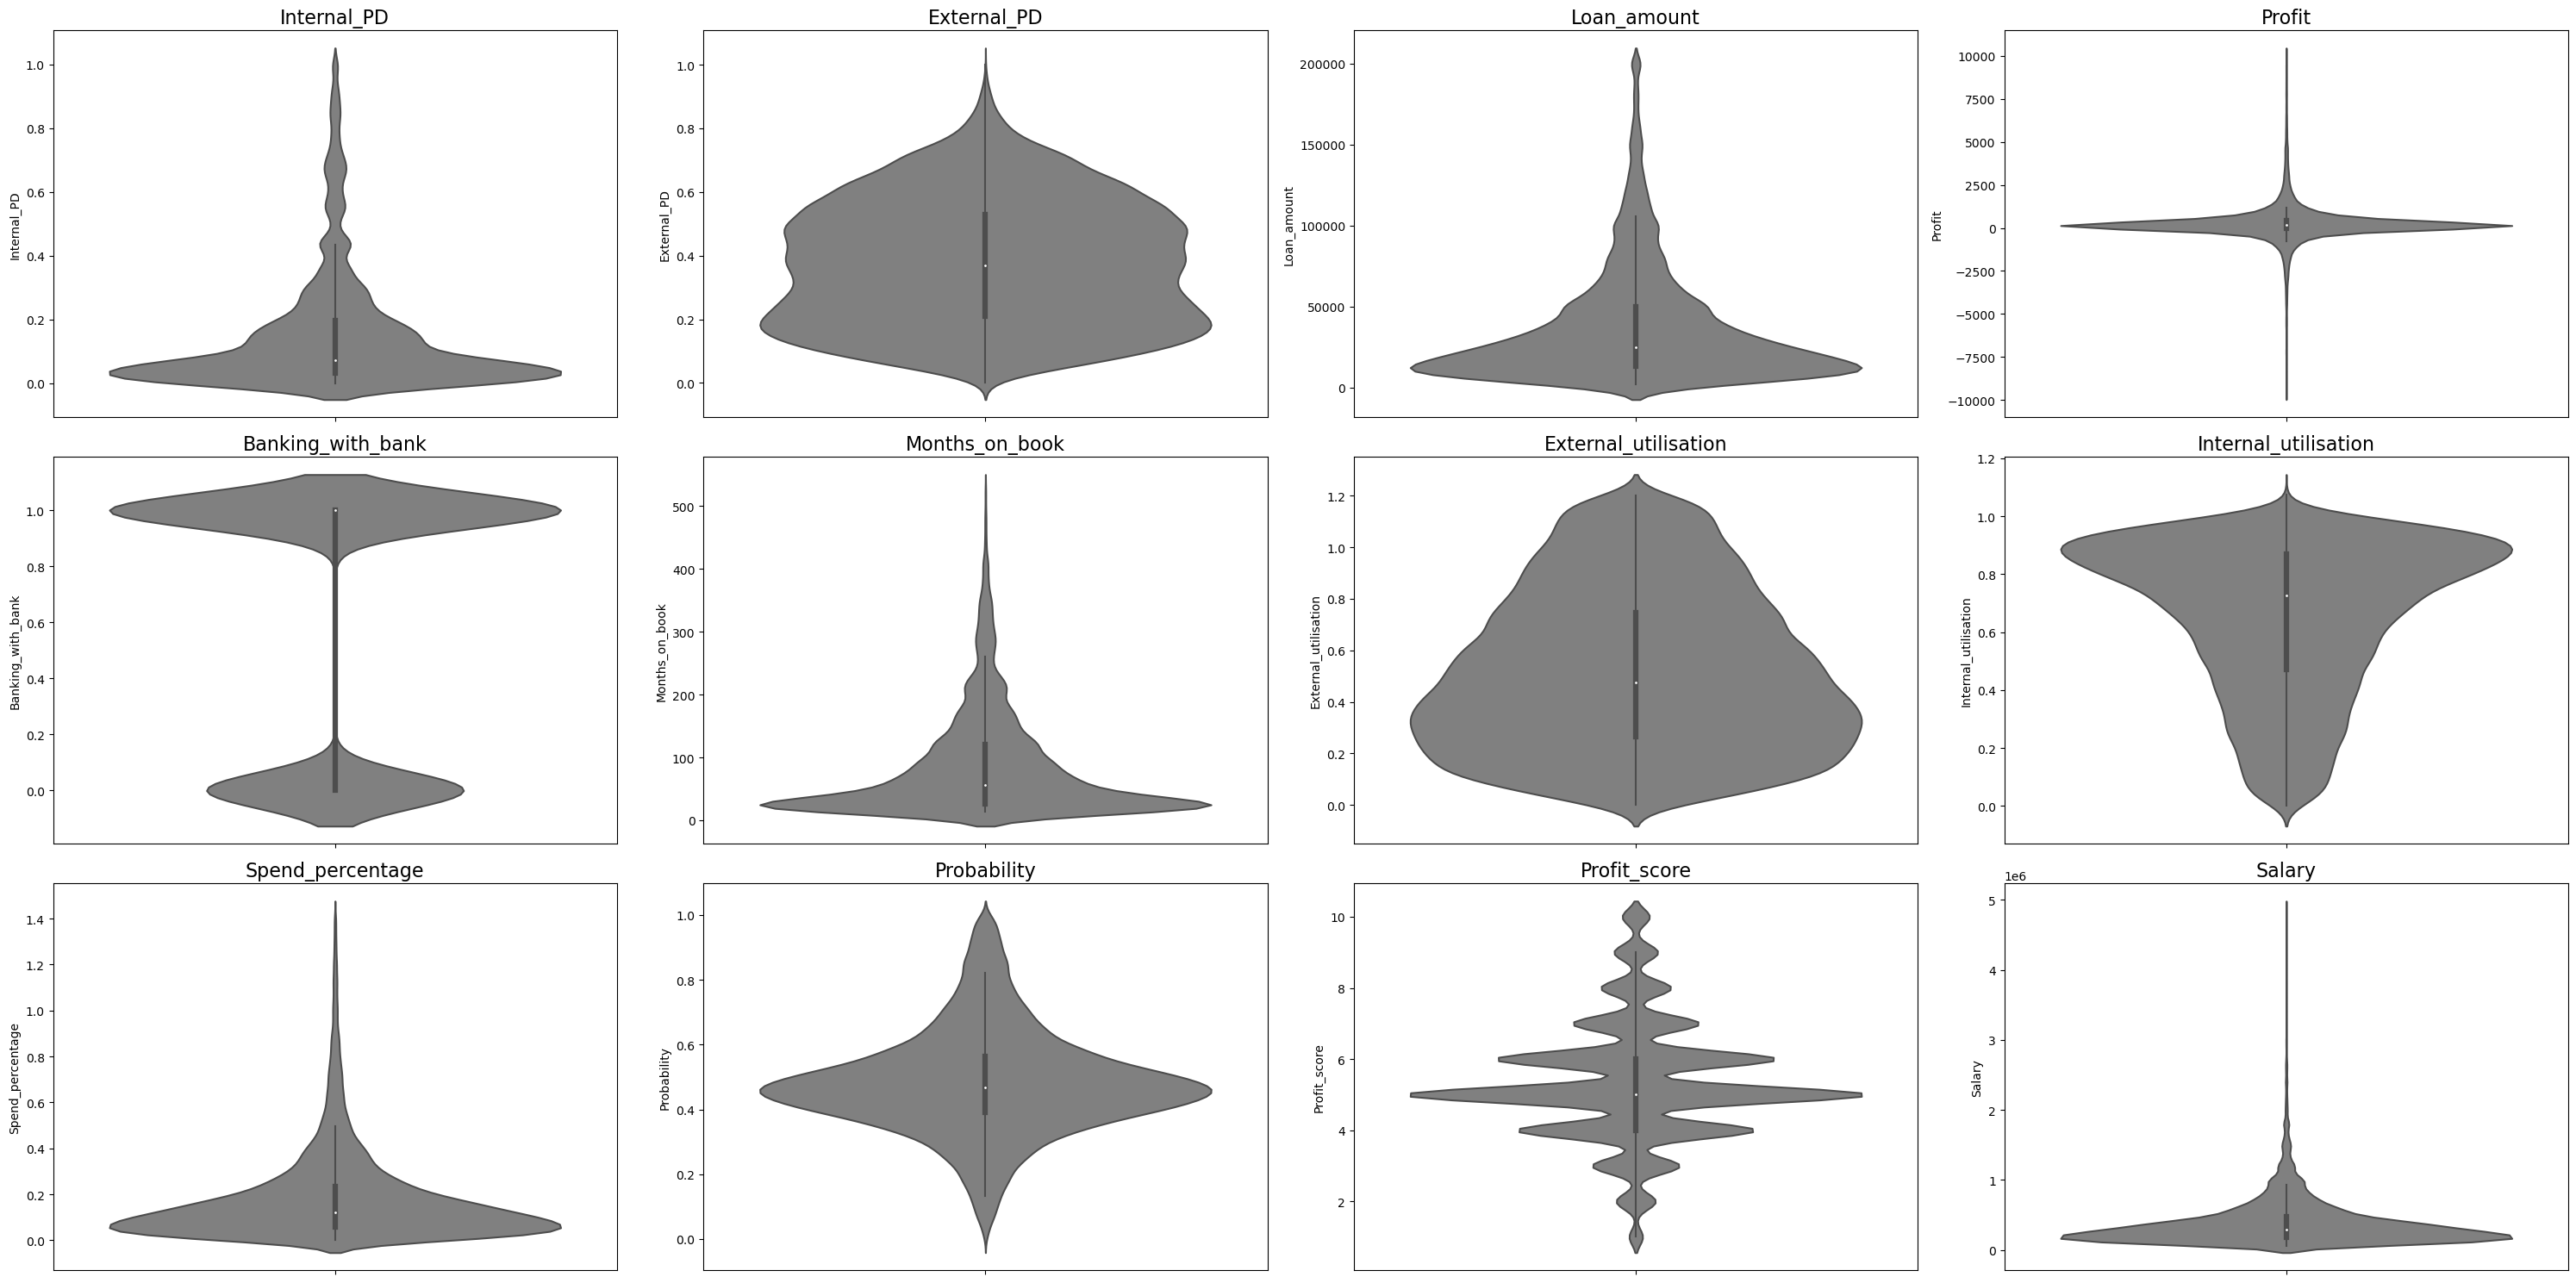

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Id','Account_status'],axis = 1)
df_copy_2.head()

fig , axs = plt.subplots(3,4, figsize=(30,15),)
fig.subplots_adjust(hspace = 0.5, wspace = .2)
axs = axs.ravel()


for index,column in enumerate(df_copy_2.columns):
    axs[index-1].set_title((column), fontsize = 16)
    sns.violinplot(y=column, data = df_copy_2, color = 'gray', ax = axs[index-1])
    
fig.tight_layout()

In [10]:
df_copy.columns

Index(['Id', 'Account_status', 'Salary', 'Internal_PD', 'External_PD',
       'Loan_amount', 'Profit', 'Banking_with_bank', 'Months_on_book',
       'External_utilisation', 'Internal_utilisation', 'Spend_percentage',
       'Probability', 'Profit_score'],
      dtype='object')

**Remark**

Salary, profit and internal and external PDs clearly have outliers. Lastly we will use z scores to get a sense of how many outliers exists 

In [11]:
total_len = len(df_copy)
total_len

23455

In [12]:
from scipy import stats

outliers = 0
for index, column in enumerate(df_copy_2.columns):
    outliers += len(df_copy[np.abs(stats.zscore(df_copy_2[column])) >= 3])
    print("{} has {} outliers which is {}% of the data".format(column,len(df_copy[np.abs(stats.zscore(df_copy_2[column])) >= 3]),np.round(len(df_copy[np.abs(stats.zscore(df_copy_2[column])) >= 3])/total_len,4)*100))

Salary has 421 outliers which is 1.79% of the data
Internal_PD has 627 outliers which is 2.67% of the data
External_PD has 2 outliers which is 0.01% of the data
Loan_amount has 514 outliers which is 2.19% of the data
Profit has 581 outliers which is 2.48% of the data
Banking_with_bank has 0 outliers which is 0.0% of the data
Months_on_book has 499 outliers which is 2.13% of the data
External_utilisation has 0 outliers which is 0.0% of the data
Internal_utilisation has 0 outliers which is 0.0% of the data
Spend_percentage has 581 outliers which is 2.48% of the data
Probability has 90 outliers which is 0.38% of the data
Profit_score has 0 outliers which is 0.0% of the data


There is a obvious outliers and errors, we cannot have consistency above 1 and below 0 similar with probability

In [13]:
from scipy import stats

outliers = 0
for index, column in enumerate(df_copy_2.columns):
    df_copy = df_copy[np.abs(stats.zscore(df_copy_2[column])) < 3]
    
print(f'removing outliers reduced the data by {round(1- len(df_copy)/total_len,4)*100}%')

removing outliers reduced the data by 12.57%


C:\Users\NB331981\AppData\Local\Temp\ipykernel_24060\1004757332.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[np.abs(stats.zscore(df_copy_2[column])) < 3]


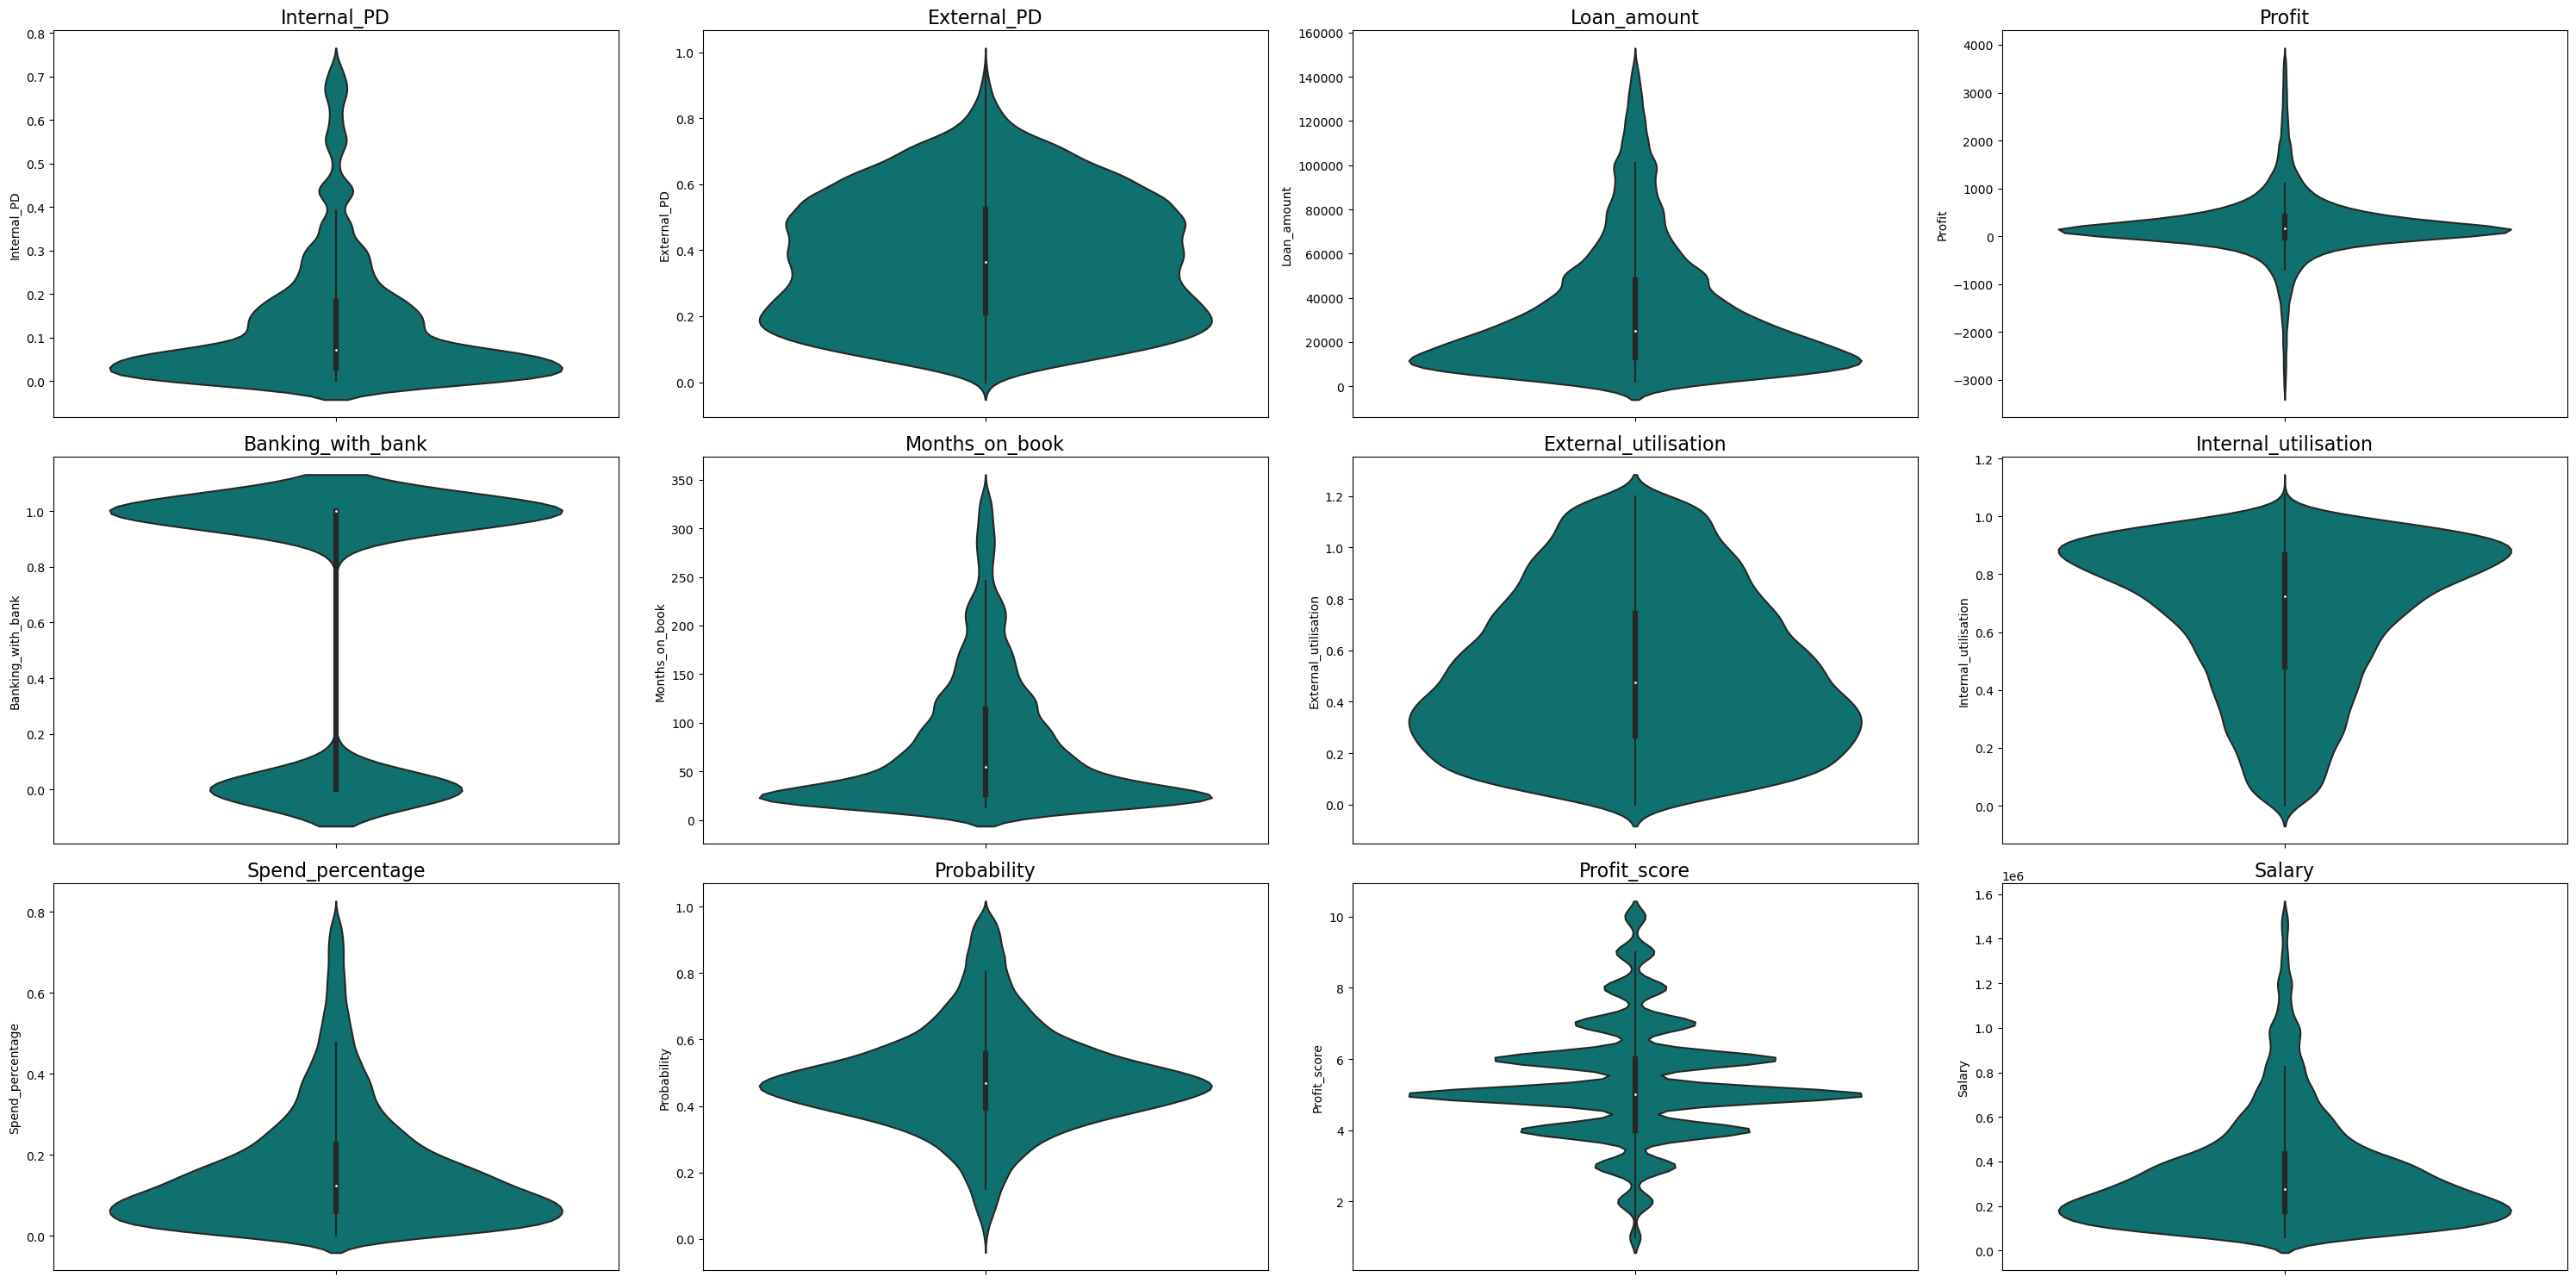

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Id','Account_status'],axis = 1)
df_copy_2.head()

fig , axs = plt.subplots(3,4, figsize=(30,15),)
fig.subplots_adjust(hspace = 0.5, wspace = .2)
axs = axs.ravel()


for index,column in enumerate(df_copy_2.columns):
    axs[index-1].set_title((column), fontsize = 16)
    sns.violinplot(y=column, data = df_copy_2, color = 'teal', ax = axs[index-1])
    
fig.tight_layout()

In [16]:
len(df_copy)

20507

This is a much better distribution 

In [17]:
df_copy.columns

Index(['Id', 'Account_status', 'Salary', 'Internal_PD', 'External_PD',
       'Loan_amount', 'Profit', 'Banking_with_bank', 'Months_on_book',
       'External_utilisation', 'Internal_utilisation', 'Spend_percentage',
       'Probability', 'Profit_score'],
      dtype='object')

#### Bucketing

Some columns have long column names, we reduce these column names

We can determine the profit scores by using both classification and regression models. However classification is more suitable for our purpose of determining segments that are profitable, as with regression we won't have the luxury of discretizing the continious features. To make this project exhaustive, ensuring we've covered all areas, we will use both regression and classification. For the purpose of classification we will add additional columns of continious variables discretized.

We will descretize:
1. Internal_PD
2. External_PD
3. Loan_amount
4. Months_on_book
5. External_utilisation
6. Internal_utilisation
7. Spend_percentage
8. Salary

We first evaluate the distribution to have a sense of what buckets to create / how to segment it, and later check that there is enough volume in each bucket.

In [18]:
def histogram(col):
    print(f" min = {np.min(col)} , max = {np.max(col)}")
    plt.hist(col, bins = 100, color = 'gray')
    plt.rcParams['figure.figsize'] = [6,2]
    plt.show()

In [19]:
def horizontal_bar(col):
    x = df_copy.groupby([col]).count().reset_index()[[col,'Id']]
    str_x = []
    for i in x[col]:
        str_x.append(str(i))
    plt.barh(str_x,x['Id']/np.sum(x['Id']),color = 'teal')

**Internal PD**

 min = 0.0 , max = 1.0


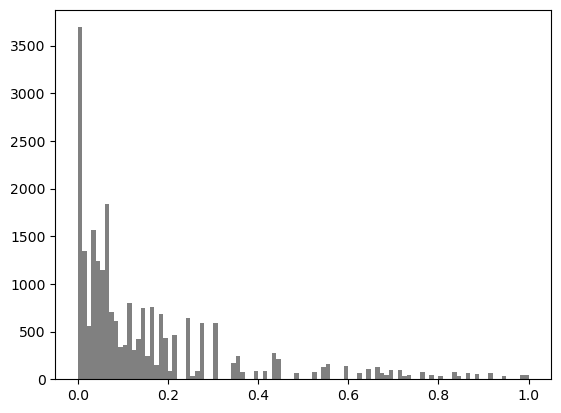

In [20]:
histogram(df.Internal_PD)

In [21]:
# Create initial buckets since applicant incomes are different and modify buckets until there's a somewhat appriopriate
#distribution between buckets 
df_copy['Internal_PD_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Internal_PD'] <= 0.01,
            df_copy['Internal_PD'].between(0.01, 0.03,inclusive='right'),
            df_copy['Internal_PD'].between(0.03, 0.04,inclusive='right'),
            df_copy['Internal_PD'].between(0.04, 0.07,inclusive='right'),
            df_copy['Internal_PD'].between(0.07, 0.10,inclusive='right'),
            df_copy['Internal_PD'].between(0.10, 0.15,inclusive='right'),
            df_copy['Internal_PD'].between(0.15, 0.25,inclusive='right'),
            df_copy['Internal_PD'] > 0.25
            
        ],
        [
            0.01,
            0.03,
            0.04,
            0.07,
            0.10,
            0.15,
            0.25,
            1
        ],
        default = -1
        )

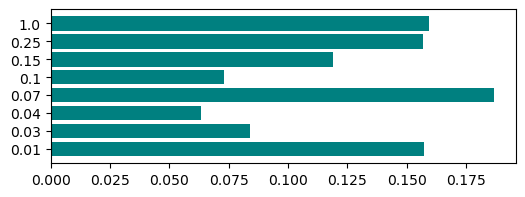

In [22]:
horizontal_bar('Internal_PD_band')

**External PD**

 min = 0.0 , max = 1.0


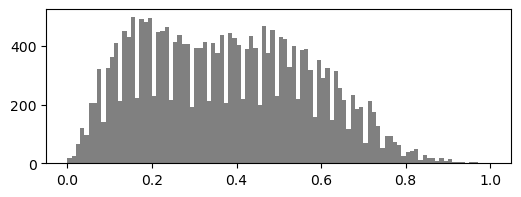

In [23]:
histogram(df.External_PD)

In [24]:
# Create initial buckets since applicant incomes are different and modify buckets until there's a somewhat appriopriate
#distribution between buckets 
df_copy['External_PD_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['External_PD'] <= 0.10,
            df_copy['External_PD'].between(0.10, 0.2,inclusive='right'),
            df_copy['External_PD'].between(0.2, 0.3,inclusive='right'),
            df_copy['External_PD'].between(0.3, 0.4,inclusive='right'),
            df_copy['External_PD'].between(0.4, 0.5,inclusive='right'),
            df_copy['External_PD'].between(0.5, 0.6,inclusive='right'),
            df_copy['External_PD'].between(0.6, 0.7,inclusive='right'),
            df_copy['External_PD'] > 0.7
            
        ],
        [
            0.1,
            0.2,
            0.3,
            0.4,
            0.5,
            0.6,
            0.7,
            1
        ],
        default = -1
        )

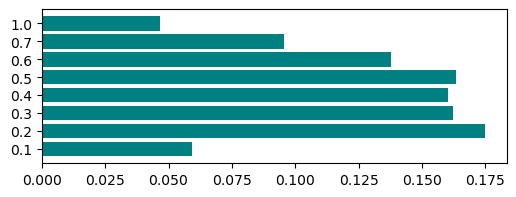

In [25]:
horizontal_bar('External_PD_band')

**Loan_amount**

 min = 2000.0 , max = 200000.0


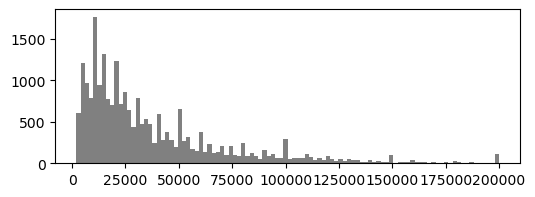

In [26]:
histogram(df.Loan_amount)

In [27]:
# Create initial buckets since applicant incomes are different and modify buckets until there's a somewhat appriopriate
#distribution between buckets 
df_copy['Loan_amount_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Loan_amount'] <= 10000,
            df_copy['Loan_amount'].between(10000, 20000,inclusive='right'),
            df_copy['Loan_amount'].between(20000, 40000,inclusive='right'),
            df_copy['Loan_amount'].between(40000, 75000,inclusive='right'),
            df_copy['Loan_amount'].between(75000, 200000,inclusive='right')
            
        ],
        [
            10000,
            20000,
            40000,
            75000,
            200000
        ],
        default = -1
        )

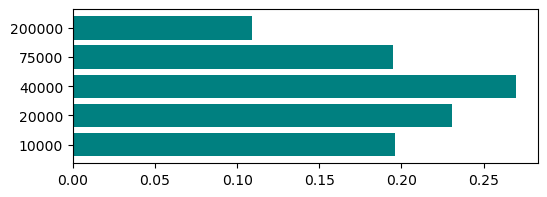

In [28]:
horizontal_bar('Loan_amount_band')

 min = 13.0 , max = 528.0


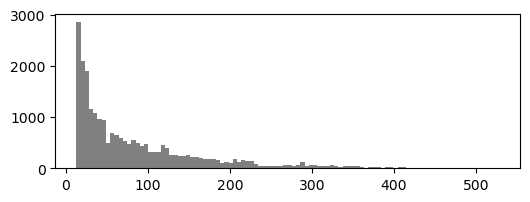

In [29]:
histogram(df.Months_on_book)


In [30]:
# Create initial buckets since applicant incomes are different and modify buckets until there's a somewhat appriopriate
#distribution between buckets 
df_copy['Months_on_book_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Months_on_book'] <= 24,
            df_copy['Months_on_book'].between(24, 60,inclusive='right'),
            df_copy['Months_on_book'].between(60, 120,inclusive='right'),
            df_copy['Months_on_book'].between(120, 180,inclusive='right'),
            df_copy['Loan_amount'] > 180
            
        ],
        [
            24,
            60,
            120,
            180,
            600
        ],
        default = -1
        )

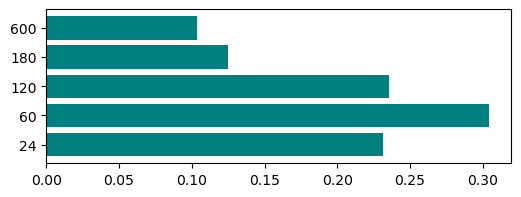

In [31]:
horizontal_bar('Months_on_book_band')

 min = 3.755364806866953e-05 , max = 1.199986839219127


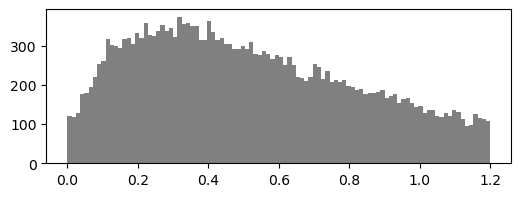

In [32]:
histogram(df.External_utilisation)


In [33]:
# Create initial buckets since applicant incomes are different and modify buckets until there's a somewhat appriopriate
#distribution between buckets 
df_copy['External_utilisation_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['External_utilisation'] <= 0.2,
            df_copy['External_utilisation'].between(0.2, 0.4,inclusive='right'),
            df_copy['External_utilisation'].between(0.4, 0.6,inclusive='right'),
            df_copy['External_utilisation'].between(0.6, 0.8,inclusive='right'),
            df_copy['External_utilisation'].between(0.8, 1,inclusive='right'),
            df_copy['External_utilisation'].between(1, 1.5,inclusive='right'),
            df_copy['Loan_amount'] > 1.5
            
        ],
        [
            0.2,
            0.4,
            0.6,
            0.8,
            1,
            1.5,
            2
        ],
        default = -1
        )

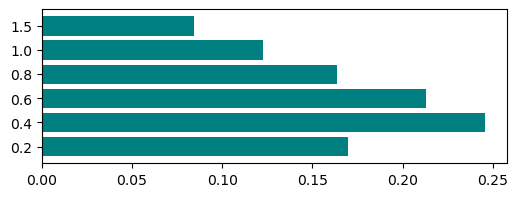

In [34]:
horizontal_bar('External_utilisation_band')

 min = 0.000287 , max = 1.073706


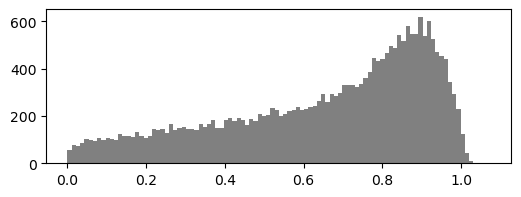

In [35]:
histogram(df.Internal_utilisation)


In [36]:
#distribution between buckets 
df_copy['Internal_utilisation_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Internal_utilisation'] <= 0.2,
            df_copy['Internal_utilisation'].between(0.2, 0.4,inclusive='right'),
            df_copy['Internal_utilisation'].between(0.4, 0.6,inclusive='right'),
            df_copy['Internal_utilisation'].between(0.6, 0.8,inclusive='right'),
            df_copy['Internal_utilisation'].between(0.8, 0.9,inclusive='right'),
            df_copy['Loan_amount'] > 0.9
            
        ],
        [
            0.2,
            0.4,
            0.6,
            0.8,
            0.9,
            2
        ],
        default = -1
        )

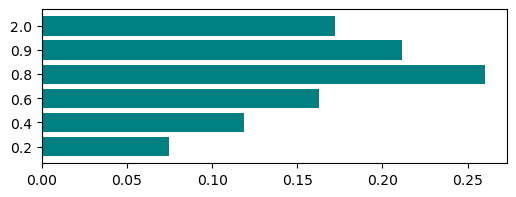

In [37]:
horizontal_bar('Internal_utilisation_band')

 min = 0.0 , max = 1.422559


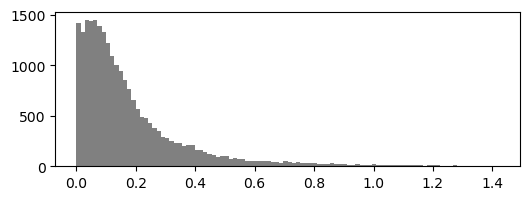

In [38]:
histogram(df.Spend_percentage)

In [39]:
#distribution between buckets 
df_copy['Spend_percentage_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Spend_percentage'] <= 0.05,
            df_copy['Spend_percentage'].between(0.05, 0.1,inclusive='right'),
            df_copy['Spend_percentage'].between(0.1, 0.2,inclusive='right'),
            df_copy['Spend_percentage'].between(0.2, 0.5,inclusive='right'),
            df_copy['Spend_percentage'] > 0.5
            
        ],
        [
            0.05,
            0.1,
            0.2,
            0.5,
            2
        ],
        default = -1
        )

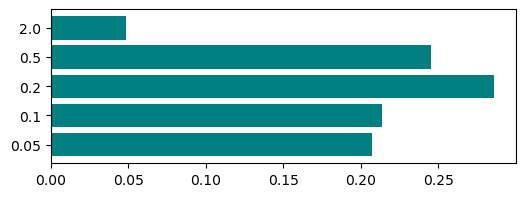

In [40]:
horizontal_bar('Spend_percentage_band')

 min = 60000.0 , max = 4884000.0


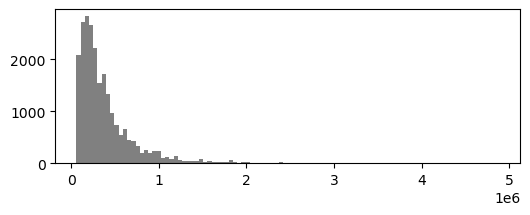

In [41]:
histogram(df.Salary)

In [42]:
#distribution between buckets 
df_copy['Salary_band'] = np.select(
        [
            #df['ApplicantIncome']==-1,
            df_copy['Salary'] <= 120000,
            df_copy['Salary'].between(120000, 180000,inclusive='right'),
            df_copy['Salary'].between(180000, 240000,inclusive='right'),
            df_copy['Salary'].between(240000, 360000,inclusive='right'),
            df_copy['Salary'].between(360000, 600000,inclusive='right'),
            df_copy['Salary'] > 600000
            
        ],
        [
            120000,
            180000,
            240000,
            360000,
            600000,
            1000000
        ],
        default = -1
        )

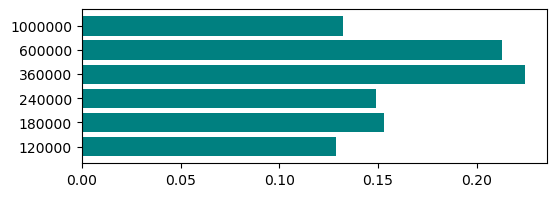

In [43]:
horizontal_bar('Salary_band')

In [44]:
import os 
path_all = os.getcwd()
df_copy.to_csv(path_all + '\data_band.csv')

---
<a id = "five" ></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


external vs internal 

To avoid making the notebook length, we explore four views, and the other data exploration views can be found in the powerbi in this link. They are more interactive. Here we focus more on correlation analysis.

[]

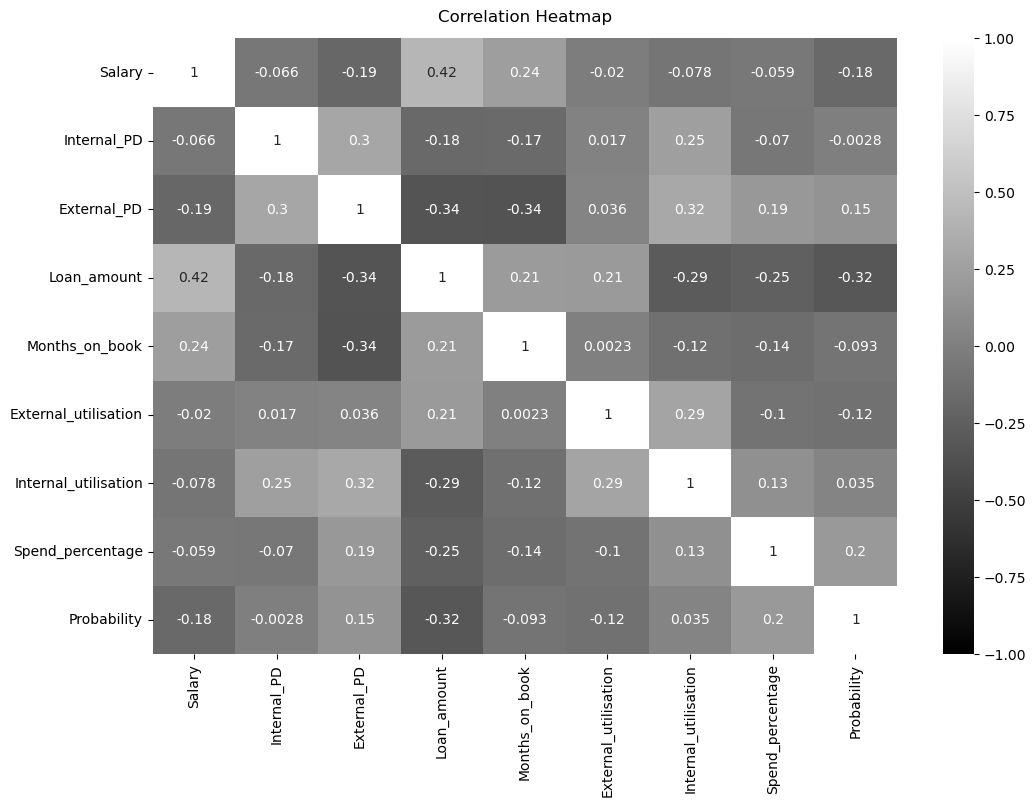

In [45]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
df_copy_2 = df_copy_2.drop(['Profit_score','Profit','Banking_with_bank'],axis = 1)
heatmap = sns.heatmap(df_copy_2.corr(),vmin=-1, vmax=1, cmap = "gray" ,annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.plot()

#remove profit and profit score and banking with bank

Let see a more visual of the relationships

The profitability is more correlated to the internal utilisation than the external utilisation

Highlight interesting insights, and potential outliers, see when mean or median imply potential outliers or min or max compared to averages

In [ ]:
sns.pairplot(df_copy_2)

#### Data visualiztion (put in powerbi) profitability histogram and profit score bars and average profit 

In [ ]:
print('Average profit: ' + str(np.mean(df.Profit)))

Highlight interesting patterns, especially between external and internal

#### Correlation analysis with key variable

do customers with low profit scores have negative profitability ? Explore this in powerbi

In [ ]:
fig , axs = plt.subplots(2,6, figsize=(30,12),)
fig.subplots_adjust(hspace = 0.5, wspace = .2)
axs = axs.ravel()


df_copy_2 = df_copy.copy()
df_copy_2 = df_copy_2.drop(['Id','Account_status','Product'],axis = 1)

for index, column in enumerate(df_copy_2.columns):
    axs[index-1].set_title("{} vs. profit score".format(column), fontsize=16)
    axs[index-1].scatter(x=df_copy_2[column],y=df_copy['Probability'], color = 'g')
    
fig.tight_layout(pad=1)

Highlight interesting insights

Only profitability is highly correlated with profit score

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


### Regression models

In [ ]:
df_copy.head()

In [ ]:
from scipy.stats import pearsonr

corrs = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
       'Months_on_book', 'External_utilisation',
       'Internal_utilisation', 'Spend_percentage', 
                 'Probability']].corr()['Probability'].sort_values(ascending=False)

dict_cp = {}

column_titles = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
       'Months_on_book', 'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]

for col in column_titles:
    p_val = round(pearsonr(df_copy[col],df_copy['Probability'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_value')
df_cp_sorted[df_cp_sorted['P_value']<0.1]

In [ ]:
df_copy.columns

In [ ]:
#Include product (first convert to numeric)
X = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
        'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]

#y = df_copy[['Probability','Profit_score']]
y = df_copy[['Probability']]

#y_train = y_train[['Probability']]
#y_profit_score =  y_test[['Profit_score']]
#y_test = y_test[['Probability']]


x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(X_train)
y_scaled = y_scaler.fit_transform(y_train)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_scaled,
                                                    test_size = 0.20,
                                                    random_state = 42)


In [ ]:
model = RandomForestRegressor(max_depth=10, n_estimators=200)
model = model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"{name} Test MSE: {mse}")
print(f"{name} R squared: {metrics.r2_score(y_test,y_pred)}")

In [ ]:
Random Forest Test MSE: 0.7964640504467998
Random Forest R squared: 0.2300113909365511

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

fig, axs = plt.subplots(1,5, figsize=(3,12))
# Define models and hyperparameters
models = {
    'Linear regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision tree' : DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
    
}

param_grid = {
    'Linear regression': {},
    'Ridge': {'alpha': [0.1, 1, 10]},
    'Lasso': {'alpha': [0.1, 1, 10]},
    'Decision tree': {'max_depth': [None, 10, 20, 30]
                     },
    'Random Forest': {'n_estimators': [50,100,200],
                     'max_depth': [None,10,20,30]}
    
}

# Perform Grid Search
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train.ravel())
    best_models[name] = grid_search.best_estimator_

    print(best_models)
# Evaluate the best model
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Test MSE: {mse}")
    print(f"{name} R squared: {metrics.r2_score(y_test,y_pred)}")

#Add progress bar

In [ ]:
##View 1 (evalualuation metric)

Ensembling of best models

Voting

In [ ]:
models = [('lr',best_models['Linear regression']),('ridge',best_models['Ridge']),('rf',best_models['Random Forest'])]

model_weightings = np.array([0.2,0.3,0.5])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)
v_reg.fit(X_train,y_train.ravel())
y_pred = v_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

In [ ]:
mse

Stacking

In [ ]:
models = [('lr',best_models['Linear regression']),('ridge',best_models['Ridge']),('rf',best_models['Random Forest'])]

meta_learner_reg = RandomForestRegressor(max_depth=10, n_estimators=200)

s_reg = StackingRegressor(estimators = models, final_estimator = meta_learner_reg )
s_reg.fit(X_train,y_train.ravel())


In [ ]:
y_pred = s_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse, metrics.r2_score(y_test,y_pred)

Principal component analysis , to reduce features 

In [ ]:
best_models

In [ ]:
from sklearn.decomposition import PCA
pca_reg = PCA(n_components = 8)
X_train = pca_reg.fit_transform(X_train)
X_test = pca_reg.transform(X_test)

for name, model in best_models.items():
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Test MSE: {mse}")
    print(f"{name} R squared: {metrics.r2_score(y_test,y_pred)}")


### Classification models 

In [ ]:
#Include product (first convert to numeric)
X = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
       'Months_on_book', 'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]

y = df_copy[['Profit_score']]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Include product (first convert to numeric)
X = df_copy[['Salary', 'Internal_PD',
       'External_PD', 'Loan_amount', 'Banking_with_bank',
       'Months_on_book', 'External_utilisation',
       'Internal_utilisation', 'Spend_percentage']]

#y = df_copy[['Probability','Profit_score']]
y = df_copy[['Profit_score']]

#y_train = y_train[['Probability']]
#y_profit_score =  y_test[['Profit_score']]
#y_test = y_test[['Probability']]


x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = x_scaler.fit_transform(X_train)
y_scaled = y_scaler.fit_transform(y_train)

X_scaled = X.copy()
y_scaled = y.copy()

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_scaled,
                                                    test_size = 0.20,
                                                    random_state = 42)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('MSE:', metrics.accuracy_score(y_test,y_pred))


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
row reg/ class , columns - basic models 

In [ ]:
row reg/ class , columns - sub optimal models 

In [ ]:
Find the best performing 

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


Future include more fields like how many other creidt cards do they have, payment history 

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
Include references to industry targets on ROE , NIM, NTM

## Additional Sections to Consider

* ### Appendix: 
### Clustering analysis 
Show the work here and analysis 

### Links
In case you may have missed the links in the notebook:

* PowerBI dashboard for further exploratory data analysis: 
* Google slides for the final presentation:
* Streamlit app for predicting the score of a given client portfolio:
* Trello for project management:

* ### Contributors: 
Vuyiswa Kubalasa
